In [1]:
#Importing Necessary Libraries
import pandas as pd
import re

Dataset Preperation

In [2]:
#Loading the Dataset
data_true=pd.read_csv('True.csv')
data_false=pd.read_csv('fake.csv')
data_true['Label']=1
data_false['Label']=0
df=pd.concat([data_true,data_false],axis=0).sample(frac=1).dropna(axis=0).reset_index(drop=True)

In [3]:
df.sample(2)

,title,text,subject,date,Label
27979,U.S. court skeptical of lawmaker immunity in t...,NEW YORK (Reuters) - A federal appeals court f...,politicsNews,"June 13, 2016",1
31463,"Smart Cities, Androids, Technocracy, Kevin Spa...",Tune in to the Alternate Current Radio Network...,US_News,"November 3, 2017",0


In [4]:
df.shape

(44898, 5)

In [5]:
#Get the independent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

Model fitting and NLP

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(X)):
    review=re.sub('[^a-zA-Z]',' ',X['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [7]:
#Applying CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [8]:
X.shape

(44898, 5000)

In [9]:
y=df['Label']

In [10]:
#Divinding the Data into Train and test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [11]:
cv.get_feature_names_out()[:10]

array(['abadi', 'abandon', 'abba', 'abc', 'abc news', 'abe', 'abedin',
       'abil', 'abl', 'abort'], dtype=object)

In [12]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [13]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())
count_df.sample(5)

,abadi,abandon,abba,abc,abc news,abe,abedin,abil,abl,abort,...,zero,zika,zika fund,zimbabw,zimbabw mnangagwa,zimbabw mugab,zone,zor,zuckerberg,zuma
961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


accuracy:   0.925
Confusion matrix, without normalization


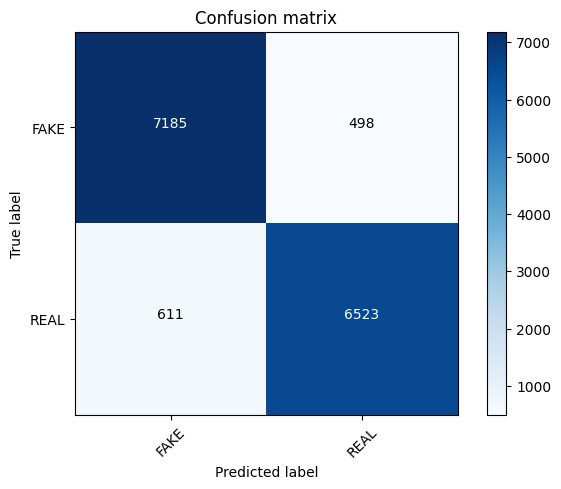

In [14]:
import matplotlib.pyplot as plt
from user_defined import plot_confusion_matrix

#MultinomialNB Algorithm
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn.metrics import accuracy_score, confusion_matrix

classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [15]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9251535398528717

Passive Aggressive Classifier Algorithmm

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.928
Confusion matrix, without normalization


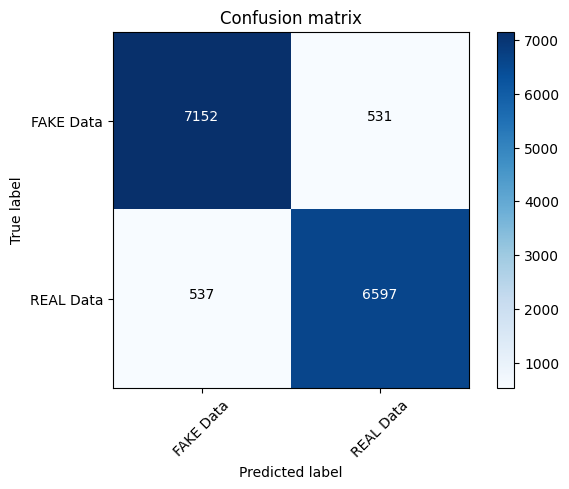

In [20]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Multinomial Classifier with Hyperparameter

In [22]:
import numpy as np
classifier=MultinomialNB(alpha=0.1)

In [23]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score =accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

c:\Users\ajai\venvs\nlp\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\ajai\venvs\nlp\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.9267733009381116
Alpha: 0.1, Score : 0.9270432611189849
Alpha: 0.2, Score : 0.9267058108928933
Alpha: 0.30000000000000004, Score : 0.9261658905311466
Alpha: 0.4, Score : 0.9256934602146183
Alpha: 0.5, Score : 0.9255584801241817
Alpha: 0.6000000000000001, Score : 0.9256259701694
Alpha: 0.7000000000000001, Score : 0.9254235000337451
Alpha: 0.8, Score : 0.9251535398528717
Alpha: 0.9, Score : 0.9252885199433084
